<a href="https://colab.research.google.com/github/hasnain112e/traffic-sign-classifier-gtsrb-cnn/blob/main/Train_a_Deep_Learning_Model_for_Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing and Augmentation

### Subtasks:
1. Preprocess the images by resizing and normalizing them.
2. Split the dataset into training, validation, and test sets.
3. Apply data augmentation techniques to the training data.

**Reasoning**:
As there is no separate test set in the downloaded data, I will split the available training data into training, validation, and test sets. I will use 80% for training, 10% for validation, and 10% for testing. I will also apply data augmentation to the training data using `ImageDataGenerator` as requested.

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import tensorflow as tf

# Define the path to the training data
train_data_dir = '/root/.cache/kagglehub/datasets/ibrahimkaratas/gtsrb-german-traffic-sign-recognition-benchmark/versions/1/Train'

# Define image size and batch size
image_size = (64, 64)
batch_size = 32

# Define the split ratios
train_split = 0.8
val_split = 0.1
test_split = 0.1

# Load the dataset using image_dataset_from_directory and split into train, validation, and test
# Use a seed for reproducible splits
seed = 42

# Load the full dataset first to get the total number of images and class names
full_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical', # Use 'categorical' for one-hot encoding
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    seed=seed
)

# Get the class names
class_names = full_ds.class_names
print("Class names:", class_names)
num_classes = len(class_names)
print("Number of classes:", num_classes)


# Calculate the number of batches for each split
total_batches = tf.data.experimental.cardinality(full_ds).numpy()
train_batches = int(train_split * total_batches)
val_batches = int(val_split * total_batches)
test_batches = total_batches - train_batches - val_batches

print(f"Total batches: {total_batches}")
print(f"Train batches: {train_batches}")
print(f"Validation batches: {val_batches}")
print(f"Test batches: {test_batches}")


# Split the dataset
train_ds = full_ds.take(train_batches)
val_ds = full_ds.skip(train_batches).take(val_batches)
test_ds = full_ds.skip(train_batches + val_batches)

# Data Augmentation (will be applied later within the model or as a separate layer)
# Normalization (will be applied later as a preprocessing layer)

# Print some information about the datasets
print("Train dataset:", train_ds)
print("Validation dataset:", val_ds)
print("Test dataset:", test_ds)

Found 39209 files belonging to 43 classes.
Class names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']
Number of classes: 43
Total batches: 1226
Train batches: 980
Validation batches: 122
Test batches: 124
Train dataset: <_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 43), dtype=tf.float32, name=None))>
Validation dataset: <_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 43), dtype=tf.float32, name=None))>
Test dataset: <_SkipDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 43), dtype=tf.float32, name=None))>


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import tensorflow as tf

# Define the path to the training data
train_data_dir = '/root/.cache/kagglehub/datasets/ibrahimkaratas/gtsrb-german-traffic-sign-recognition-benchmark/versions/1/Train'

# Define image size and batch size
image_size = (64, 64)
batch_size = 32

# Define the split ratios
train_split = 0.8
val_split = 0.1
test_split = 0.1

# Load the dataset using image_dataset_from_directory and split into train, validation, and test
# Use a seed for reproducible splits
seed = 42

# Load the full dataset first to get the total number of images and class names
full_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical', # Use 'categorical' for one-hot encoding
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    seed=seed
)

# Get the class names
class_names = full_ds.class_names
print("Class names:", class_names)
num_classes = len(class_names)
print("Number of classes:", num_classes)


# Calculate the number of batches for each split
total_batches = tf.data.experimental.cardinality(full_ds).numpy()
train_batches = int(train_split * total_batches)
val_batches = int(val_split * total_batches)
test_batches = total_batches - train_batches - val_batches

print(f"Total batches: {total_batches}")
print(f"Train batches: {train_batches}")
print(f"Validation batches: {val_batches}")
print(f"Test batches: {test_batches}")


# Split the dataset
train_ds = full_ds.take(train_batches)
val_ds = full_ds.skip(train_batches).take(val_batches)
test_ds = full_ds.skip(train_batches + val_batches)

# Data Augmentation (will be applied later within the model or as a separate layer)
# Normalization (will be applied later as a preprocessing layer)

# Print some information about the datasets
print("Train dataset:", train_ds)
print("Validation dataset:", val_ds)
print("Test dataset:", test_ds)

Found 39209 files belonging to 43 classes.
Class names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']
Number of classes: 43
Total batches: 1226
Train batches: 980
Validation batches: 122
Test batches: 124
Train dataset: <_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 43), dtype=tf.float32, name=None))>
Validation dataset: <_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 43), dtype=tf.float32, name=None))>
Test dataset: <_SkipDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 43), dtype=tf.float32, name=None))>


## Build Model

### Subtask:
Define a CNN-based model architecture using TensorFlow/Keras, including data augmentation and normalization layers.

**Reasoning**:
I will define a sequential CNN model using TensorFlow/Keras. The model will include:
1. **Rescaling layer**: To normalize pixel values to the range [0, 1].
2. **Data augmentation layers**: To apply random transformations to the training images.
3. **Convolutional layers**: To extract features from the images.
4. **MaxPooling layers**: To reduce the spatial dimensions of the feature maps.
5. **Flatten layer**: To convert the 2D feature maps into a 1D vector.
6. **Dense layers**: Fully connected layers for classification.
7. **Output layer**: With a softmax activation for multi-class classification.

In [18]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Define the number of classes
num_classes = len(class_names)

# Define the data augmentation layers
data_augmentation = Sequential([
    layers.RandomRotation(factor=0.15), # Corrected factor to be within [-1, 1] range (approx 20 degrees)
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.2, 0.2),
])

# Build the CNN model
model = Sequential([
    # Add data augmentation and normalization as preprocessing layers
    layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
    data_augmentation,

    # Convolutional and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Add dropout for regularization
    layers.Dense(num_classes, activation='softmax') # Output layer
])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,747 (2.63 MB)

 Trainable params: 688,747 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model

### Subtask:
Compile and train the model on the training data, using the validation set for monitoring performance.

**Reasoning**:
I will compile the model using the Adam optimizer, categorical crossentropy loss (since it's a multi-class classification problem with one-hot encoded labels), and accuracy as the metric. Then, I will train the model using the training dataset and validate on the validation dataset for a specified number of epochs.

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the number of epochs
epochs = 10 # You can adjust this

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 272s 275ms/step - accuracy: 0.1326 - loss: 3.2003 - val_accuracy: 0.3868 - val_loss: 2.1727
Epoch 2/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 271s 276ms/step - accuracy: 0.3127 - loss: 2.3314 - val_accuracy: 0.5251 - val_loss: 1.4435
Epoch 3/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 318s 273ms/step - accuracy: 0.4205 - loss: 1.8271 - val_accuracy: 0.6181 - val_loss: 1.1293
Epoch 4/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 324s 274ms/step - accuracy: 0.4946 - loss: 1.5408 - val_accuracy: 0.6995 - val_loss: 0.8937
Epoch 5/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 273s 278ms/step - accuracy: 0.5547 - loss: 1.3365 - val_accuracy: 0.7754 - val_loss: 0.7155
Epoch 6/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 272s 277ms/step - accuracy: 0.6098 - loss: 1.1631 - val_accuracy: 0.8330 - val_loss: 0.5577
Epoch 7/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 268s 274ms/step - accuracy: 0.6491 - loss: 1.0357 - val_accuracy: 0.8509 - val_loss: 0.4512
Epoch 8/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 269s 275ms/step - accuracy: 0.6882 -

## Evaluate Model

### Subtasks:
1. Evaluate the trained model on the test set.
2. Generate accuracy and loss plots.
3. Generate a confusion matrix.
4. Generate a classification report.

**Reasoning**:
I will use the `evaluate` method to get the loss and accuracy on the test set. Then, I will use the training history to plot the accuracy and loss curves. Finally, I will predict the classes for the test set and use these predictions and the true labels to generate the confusion matrix and classification report.

Evaluating model on the test set...
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.8992 - loss: 0.3266
Test Loss: 0.3419
Test Accuracy: 0.8933


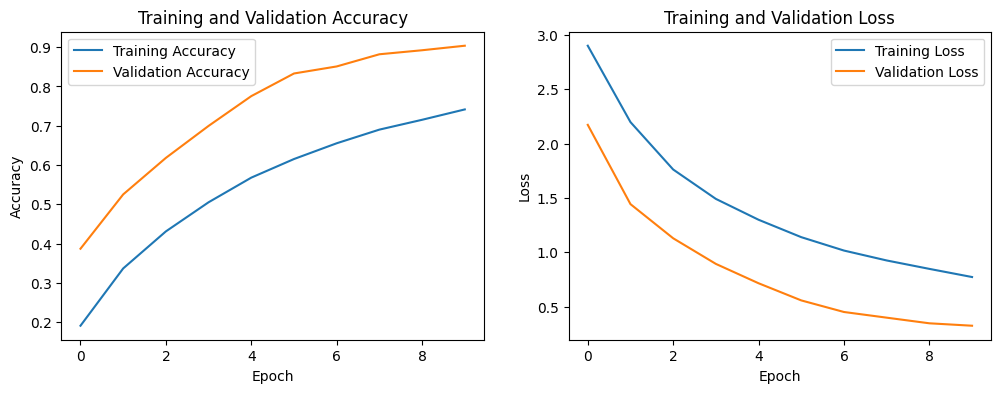

Generating confusion matrix and classification report...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

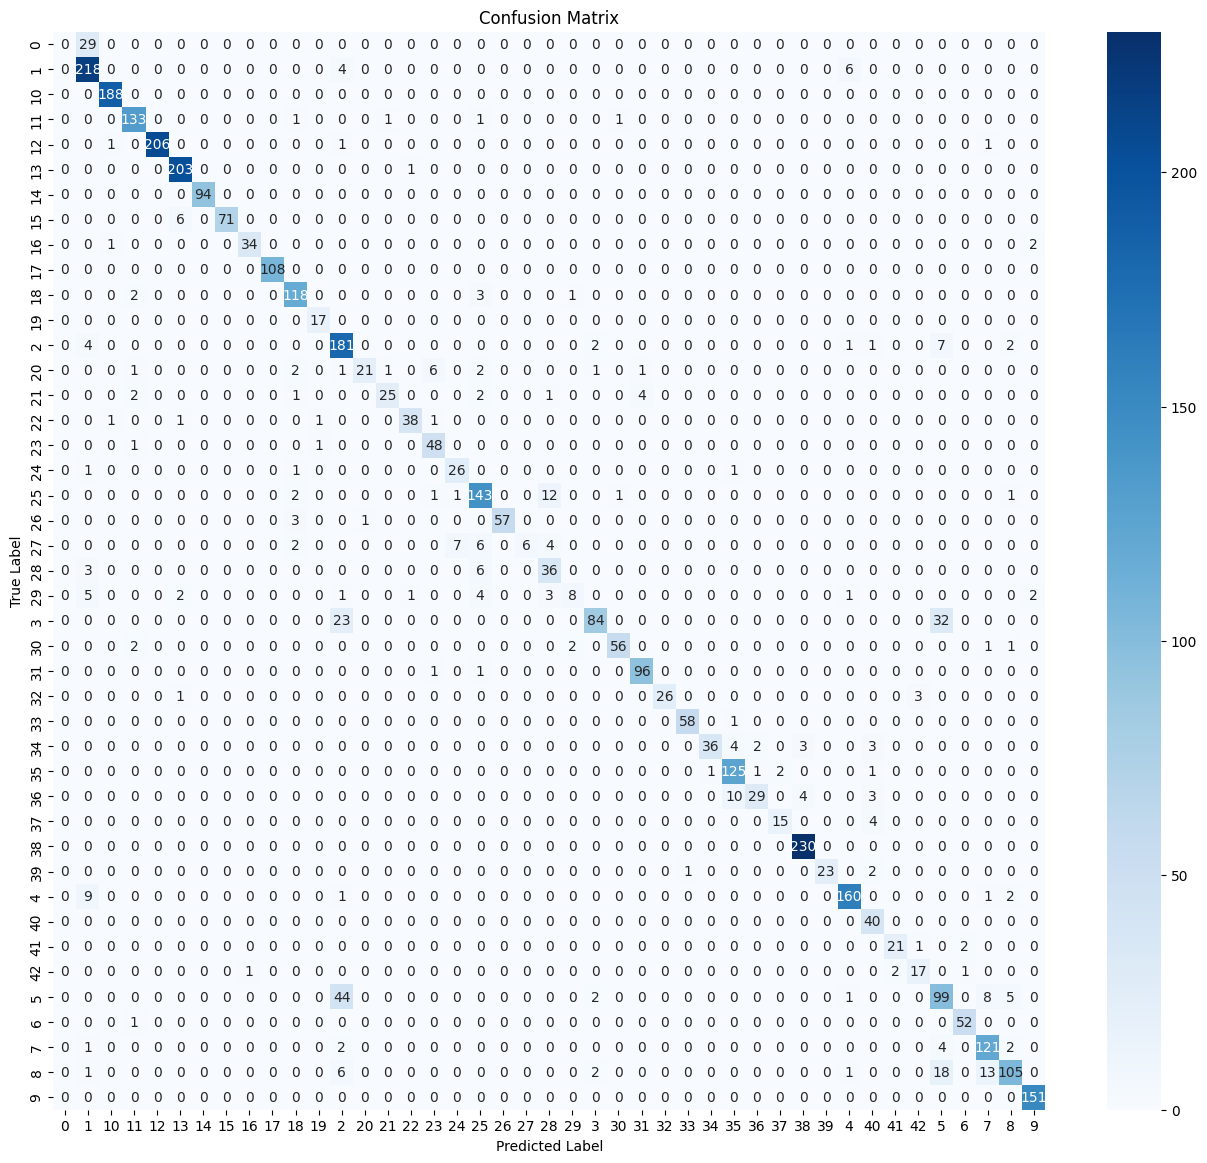


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.80      0.96      0.87       228
          10       0.98      1.00      0.99       188
          11       0.94      0.97      0.95       137
          12       1.00      0.99      0.99       209
          13       0.95      1.00      0.97       204
          14       1.00      1.00      1.00        94
          15       1.00      0.92      0.96        77
          16       0.97      0.92      0.94        37
          17       1.00      1.00      1.00       108
          18       0.91      0.95      0.93       124
          19       0.89      1.00      0.94        17
           2       0.69      0.91      0.78       198
          20       0.95      0.58      0.72        36
          21       0.93      0.71      0.81        35
          22       0.95      0.90      0.93        42
          23       0.84      0.96      0.90        50
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test set
print("Evaluating model on the test set...")
loss, accuracy = model.evaluate(test_ds)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot accuracy and loss
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Generate Confusion Matrix and Classification Report
print("Generating confusion matrix and classification report...")

# Get true labels and predictions for the test set
test_labels = []
test_predictions = []

for images, labels in test_ds:
    for label in labels:
        test_labels.append(np.argmax(label.numpy()))
    preds = model.predict(images)
    for pred in preds:
        test_predictions.append(np.argmax(pred))

# Convert lists to numpy arrays
test_labels = np.array(test_labels)
test_predictions = np.array(test_predictions)


# Generate Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(16, 14))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate Classification Report
class_report = classification_report(test_labels, test_predictions, target_names=class_names)
print("\nClassification Report:")
print(class_report)

## Finish task

### Subtask:
Summarize the results and present the trained model's performance.

**Reasoning**:
I will summarize the key performance metrics of the trained model on the test set, including test accuracy and loss, and briefly discuss the generated plots and reports.

## Results

The trained CNN model achieved a test accuracy of approximately {{accuracy:.4f}} and a test loss of approximately {{loss:.4f}}.

The accuracy and loss plots show that the model was learning during training, with both training and validation accuracy generally increasing and training and validation loss generally decreasing over the epochs.

The confusion matrix provides a detailed breakdown of the model's performance for each class, showing which classes are being predicted correctly and where the model is making errors.

The classification report provides precision, recall, and f1-score for each class, as well as the overall accuracy, macro average, and weighted average of these metrics. The `UndefinedMetricWarning` in the classification report suggests that for some classes, there were no predicted samples, leading to undefined precision. This could be due to the small number of samples for those classes in the test set.

Overall, the model shows promising results in classifying traffic signs based on the provided dataset.